In [1]:
from IPython.display import display, Math, Latex

# Libraries you might need 
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
from scipy import integrate

### Homework 2

__1. Generation of inhomogeneous Poisson process__. Consider an inhomogeneous Poisson process with instanteneous firing rate $\lambda: [0,1] \to \mathbb{R}^+$ such that $\lambda(t) = \lambda_{max} \frac{t(1-t)}{sec^2}$, where $t$ is measured in seconds, $\lambda$ in Herz [Hz]. In the next 4 points, generate $N = 100$ spike trains for $\lambda_{max} = 100$ Hz. Plot the raster plot and numeric approximation of the rate (by binning the data into 100 bins (bins of length 0.01 sec on interval [0,1] for each spike train) and computing the number of spikes in all spike trains within the bin, devided by $N$ and the bin size: $\frac{\#spikes}{N \cdot \Delta t}$).

In [2]:
lambda_max = 100  # Hz
rate = lambda t: lambda_max*t*(1-t)
N = 100  # 100 spike trains

__a) Temporal distribution method:__ As in the lecture: first find number of spikes $k$ by drawing from Poisson distribution with parameter $\mu(1) = \int_0^1\lambda(t) dt $, and then draw spike times using a density function $\lambda(t)/\mu(1)$. _(2 points)_ 

The rejection method for generating samples from pdf : https://web.mit.edu/urban_or_book/www/book/chapter7/7.1.3.html

number of spikes in each spike train:
[19 21 27 21 18 12 13 20 14 20 21 20 15 15 19 14 21 15 14 18 11 21 12 21
 22 12 12 18 13 19 16 15 18 10 15 16 13 17 11 13 16 16 16 18 19 17 11 14
 16 14 18 16 15 18 19 20 15 17 17 14 24 14 14 13 22 23 14 18 19 17 21 21
 14 21 12 24 17 10 15 24 21 15 17 22 21 22 18 16 14 16 17 16 20 16 15 16
 14 15 12 16]


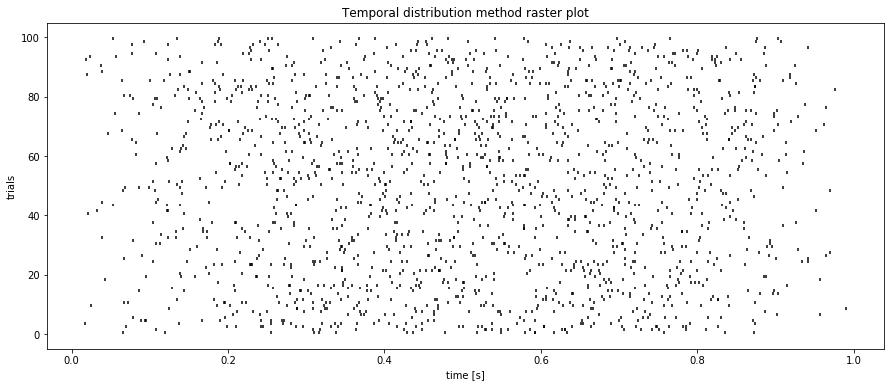

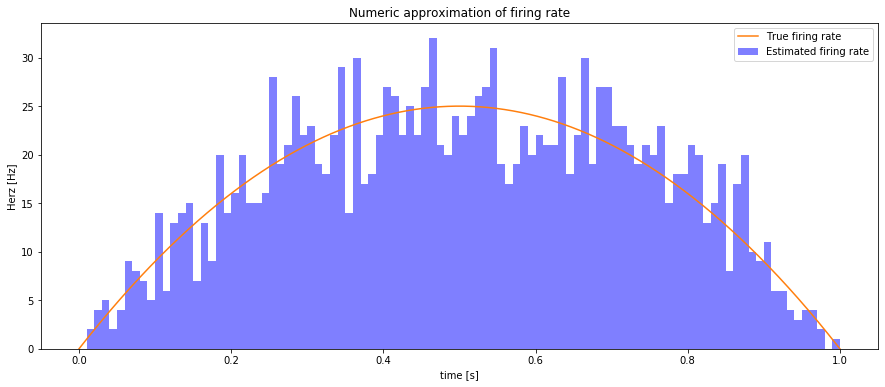

In [3]:
mu,_ = integrate.quad(rate,0,1)  # the returned value of quad is y,err
numSpikes = np.random.poisson(mu, N)  # determine spike number for the 100 spike trains
print('number of spikes in each spike train:\n' + f'{numSpikes}')

spikeTimePdf = lambda t: rate(t)/mu  # after normalization, the integral between 0, 1 is 1.
t = np.arange(0,10000)*0.0001   # only used for approximating the max value of spikeTimePdf
H = max(spikeTimePdf(t))

def spikeTimeGenerator_1(spikeNumber):
# spike time generator with Temporal distribution method
# random samples generated by rejection method
    count = 0
    spikeTime = []
    while count < spikeNumber:
        x = np.random.uniform(0,1)
        y = np.random.uniform(0,H)
        if y<= spikeTimePdf(x):
            spikeTime.append(x)
            count+=1
    return spikeTime
    
def rasterPlot(data,title):
# data: list of N list
    plt.figure(figsize=(15,6))
    for i in range(N):
        plt.vlines(data[i],i,i+1)
        plt.title(title)
        plt.xlabel('time [s]')
        plt.ylabel('trials')
    plt.show()
    
def numericApproximation(data,numBins,title):
# data: 1D array
    plt.figure(figsize=(15,6))
    dt = 1/numBins
    t = np.arange(0,10000)*0.0001
    plt.hist(data, numBins, range=(0,1),facecolor='blue', alpha=0.5, weights=1/(N*dt)*np.ones(len(result)), label='Estimated firing rate')
    plt.plot(t,rate(t),label='True firing rate')
    plt.title(title)
    plt.xlabel('time [s]')
    plt.ylabel('Herz [Hz]')
    plt.legend()
    plt.show()      
    
result=[]
for i in range(N):
    spikeTime = spikeTimeGenerator_1(numSpikes[i])
    result.append(spikeTime)    
rasterPlot(result,title='Temporal distribution method raster plot')
flatten = lambda l: [item for sublist in l for item in sublist]
result = flatten(result)
numericApproximation(result,numBins=100,title='Numeric approximation of firing rate')

__b) Bernoulli method:__ Discretize time into $m$ bins. For each bin $j = 1, \ldots, m$ draw a sample $k_i$ from a Poisson spike count distribution in that bin ( Poisson distribution with the parameter equal to integral of the $\lambda(t)$ over the bin). Generate a single spike in each bin with $k_i > 0$ drawing its time-stamp from uniform distribution within this bin. Generate rasters and estimated rate for $m = 10, \: 100, \: 1000.$ _(2 points)_ 

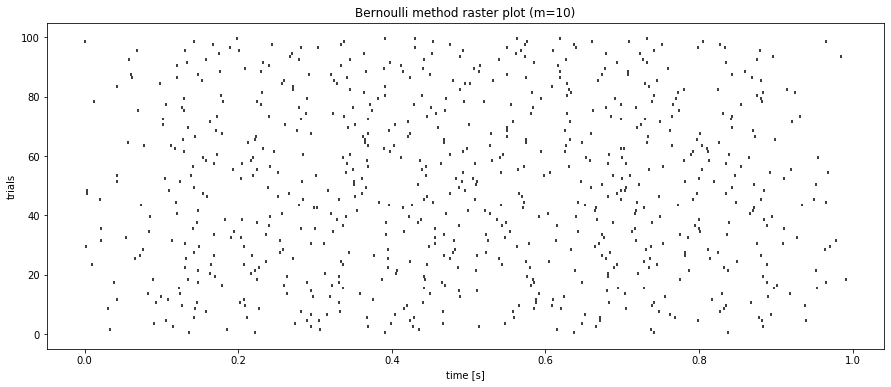

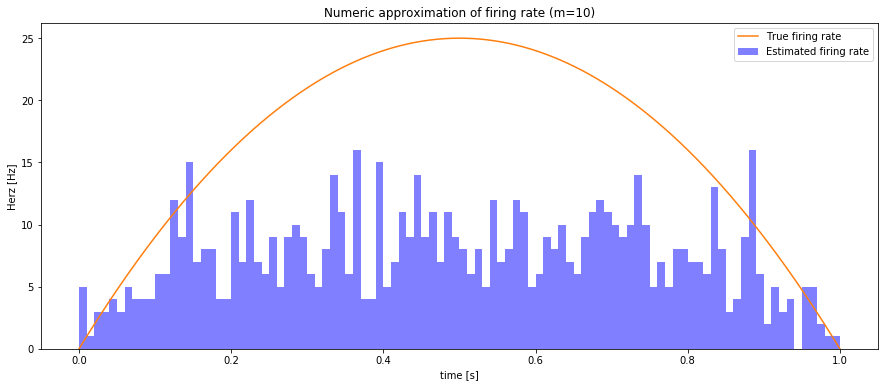

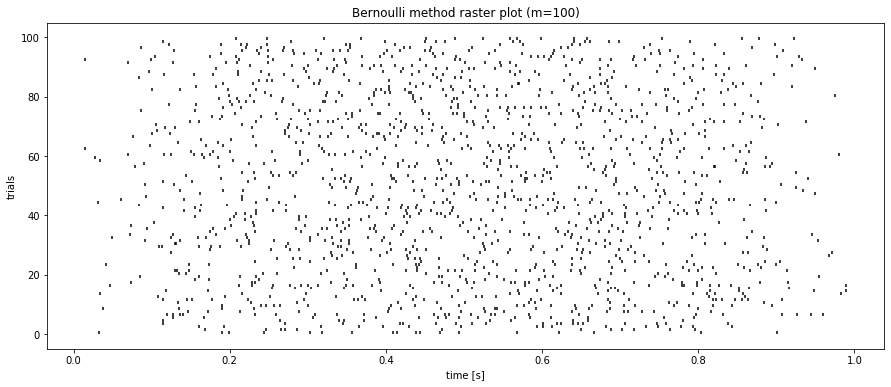

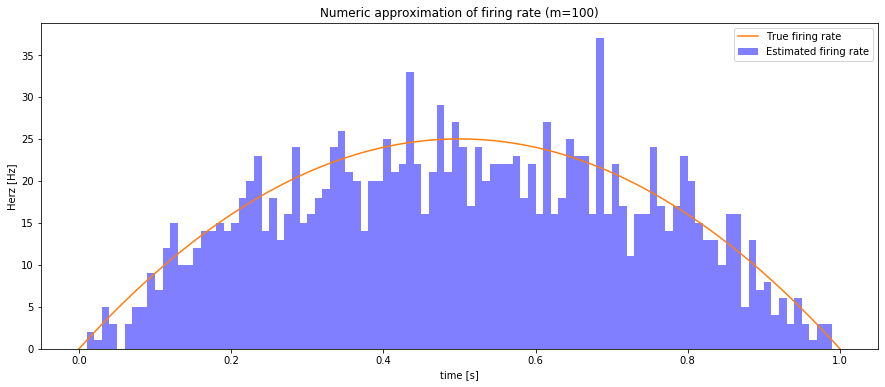

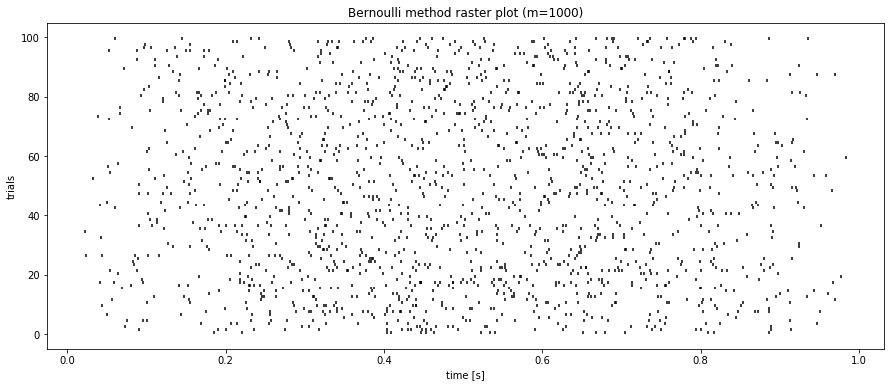

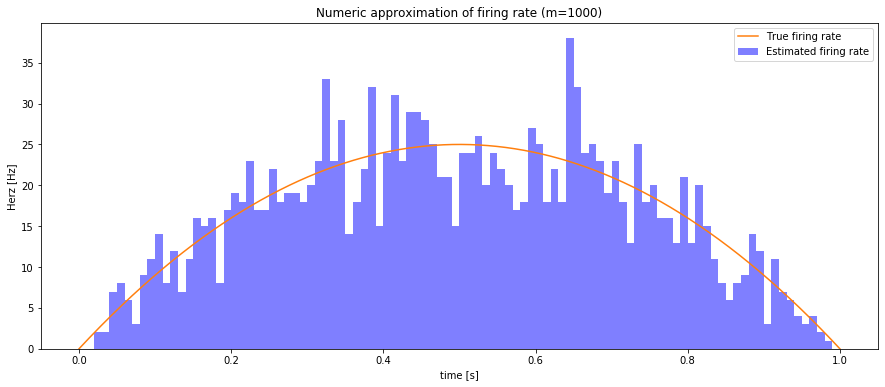

In [4]:
def spikeTimeGenerator_2(m):
# spike time generator with Bernoulli method
    time = np.arange(0,m)/m
    spikeTime=[]
    for t in time:
        mu,_ = integrate.quad(rate,t,t+1/m)
        numSpikes = np.random.poisson(mu)
        if numSpikes>0:
            temp = np.random.uniform(t,t+1/m)
            spikeTime.append(temp)
    return spikeTime

m=10
result=[]
for i in range(N):
    spikeTime = spikeTimeGenerator_2(m)
    result.append(spikeTime)
rasterPlot(result,title='Bernoulli method raster plot (m=10)')
result = flatten(result)
numericApproximation(result,numBins=100,title='Numeric approximation of firing rate (m=10)')

m=100
result=[]
for i in range(N):
    spikeTime = spikeTimeGenerator_2(m)
    result.append(spikeTime)
rasterPlot(result,title='Bernoulli method raster plot (m=100)')
result = flatten(result)
numericApproximation(result,numBins=100,title='Numeric approximation of firing rate (m=100)')

m=1000
result=[]
for i in range(N):
    spikeTime = spikeTimeGenerator_2(m)
    result.append(spikeTime)
rasterPlot(result,title='Bernoulli method raster plot (m=1000)')
result = flatten(result)
numericApproximation(result,numBins=100,title='Numeric approximation of firing rate (m=1000)')

__c) Thinning method:__ First generate a spike train from a Poisson process of rate $\lambda_{max}$ and then iterate through all spikes $l = 1, \ldots, k$ and randomly delete them with probability $1 - \lambda(t^\star_l) /\lambda_{max}$, where $t^\star_l$ is a time point of the $l$-th spike (before thinning). _(2 points)_

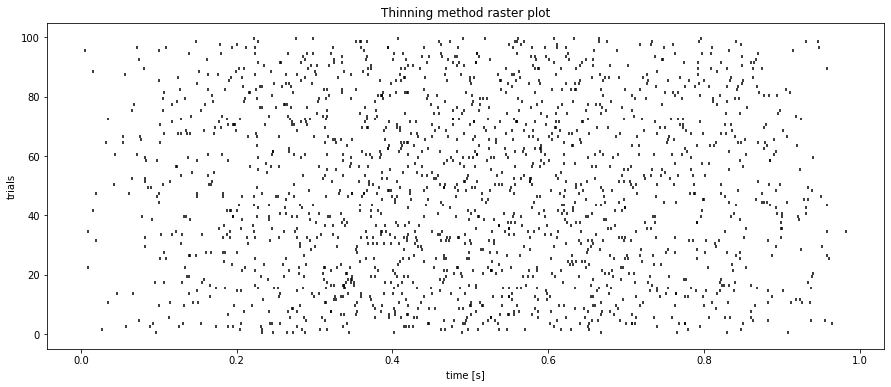

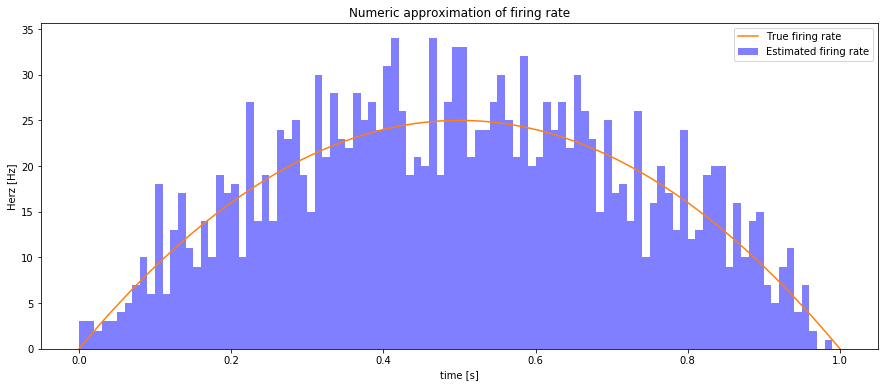

In [5]:
prob_del = lambda t: 1-rate(t)/lambda_max
def spikeTimeGenerator_3(tau, time):
# spike time generator with Thinning method
# tau: scalar, parameter used for exponential distribution
# time: scalar, [0, time] is the time interval to simulate spike train
#
# spikes: list of timestamps for the simulated spike train

    t=0
    spikeTime=[]
    # generate a spike train from a Poisson process of rate lambda_max
    # so the inter spike interval is exponential distribution with tau=1/lambda_max
    while t <= time:
        ISI = np.random.exponential(scale=tau)  #inter-spike interval
        t += ISI
        spikeTime.append(t)
    spikeTime.pop()  # pop off the last spike time 
    spikeTime = np.asarray(spikeTime)
    # random deleting spikes with probability prob_del
    spikeTime = spikeTime[np.random.uniform(size=len(spikeTime)) > prob_del(spikeTime)]
    return spikeTime

result=[]
for i in range(N):
    spikeTime=spikeTimeGenerator_3(tau=1/lambda_max, time=1)
    result.append(spikeTime)
rasterPlot(result,title='Thinning method raster plot')
result = flatten(result)
numericApproximation(result,numBins=100,title='Numeric approximation of firing rate')

__d) Renewal and time rescaling method:__ Compute $\mu(t) = \int_0^t \lambda(s) ds$. Generate a spike train for a homogeneous Poisson process with rate $1$ on an interval $[0,\mu(1)]$ (using inter-spike interval distribution as in the previous homework). Resulting spike times we call $s_1^\star, \ldots s_l^\star$. We can then find corresponding pre-images $t_l^\star = \mu^{-1}(s_l^\star) \in [0,1].$

Hint: To find the inverse of a polynomial function at a specific value you can use function np.roots (https://docs.scipy.org/doc/numpy/reference/generated/numpy.roots.html ). You will need a real root within the interval $[0,1]$.  You can also use "sympy" library to create symbolic equations and then find the inverse function using those symbolic equations _(2 points)_

$
\begin{align*}
\mu(t) &=\int_0^t \! \lambda(s) \, \mathrm{d}s\\
&= \int_0^t \! \lambda_{max} s(1-s) \, \mathrm{d}s\\
&= \lambda_{max} \int_0^t \! -s^2 + s \, \mathrm{d}s\\
&= \lambda_{max} \big[ -s^3/3 + s^2/2 \big]_0^t\\
&= -\frac{\lambda_{max}}{3}t^3 + \frac{\lambda_{max}}{2}t^2
\end{align*}
$

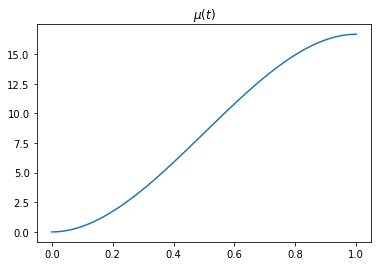

In [6]:
t = np.arange(0,10000)*0.0001
mu_t = lambda t: lambda_max*(-t**3/3+t**2/2)
plt.plot(t,mu_t(t))
plt.title('$\mu(t)$')
plt.show()

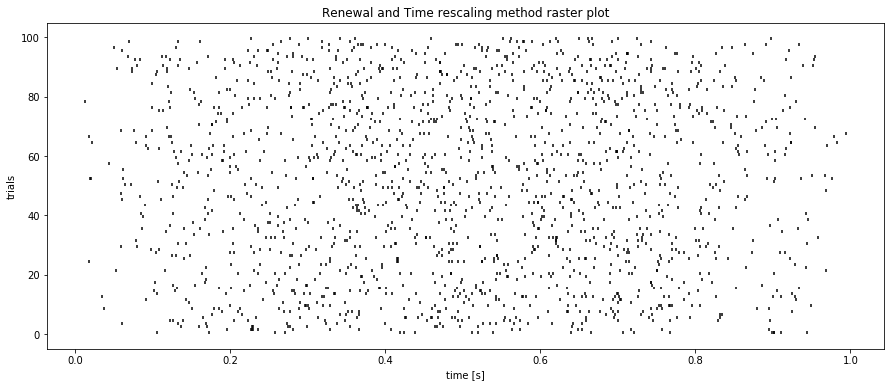

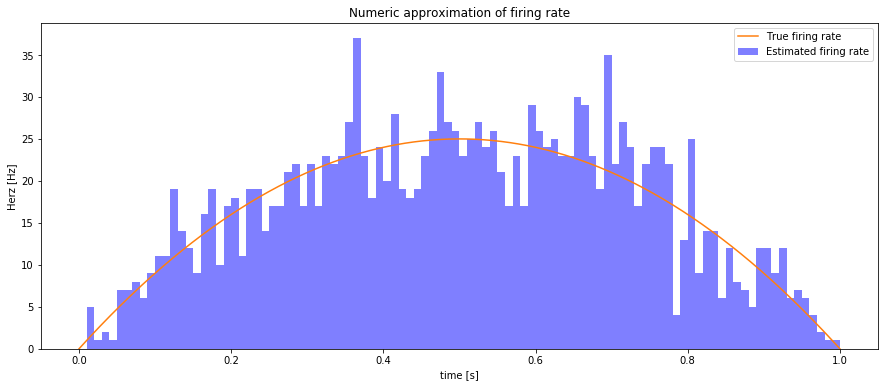

In [7]:
def spikeTimeGenerator_4(tau, time):
# spike time generator with Renewal and time rescaling method
# tau: scalar, parameter used for exponential distribution
# time: scalar, [0, time] is the time interval to simulate spike train
#
# spikes: list of timestamps for the simulated spike train
    t=0
    lambda_max=100
    spikeTime=[]
    # generate a spike train from a Poisson process of rate lambda_max
    # so the inter spike interval is exponential distribution with tau=1/lambda_max
    while t <= time:
        ISI = np.random.exponential(scale=tau)  #inter-spike interval
        t += ISI
        spikeTime.append(t)
    spikeTime.pop()  # pop off the last spike time 
    
    preImage=[]
    for i in spikeTime:
        roots = np.roots([-lambda_max/3,lambda_max/2,0,-i])
        for r in roots:
            if np.isreal(r) and r>=0 and r<=1:
                preImage.append(r)
    return preImage

result=[]
for i in range(N):
    spikeTime = spikeTimeGenerator_4(tau=1/1, time=mu_t(1))
    result.append(spikeTime)
rasterPlot(result,title='Renewal and Time rescaling method raster plot')
result = flatten(result)
numericApproximation(result,numBins=100,title='Numeric approximation of firing rate')

__2. Variance of the firing rate a)__. Determine the variance of the firing rate (across the bins) using $b = 10, \: 50, \:100$ bins from spike trains generated by method 1.a) using the law of total variance  _(1 point)_

In [50]:
N=100000
numSpikes = np.random.poisson(mu, N)
result=[]
for i in range(N):
    spikeTime = spikeTimeGenerator_1(numSpikes[i])
    result.append(spikeTime)
test=result[0]
result = flatten(result)
b=[10,50,100]
for numBins in b:
    hist,_ = np.histogram(result,bins=numBins,range=(0,1))
    hist = hist/N  # average over N trials
    dt = 1/numBins
    T = N*1  # Doing N simulation is equivalent of extending T from 1 to N*1 (think of rate(t) as a periodic function with period 1)
    variance = np.var(hist)/dt**2-sum(hist)/dt/T
    print('The variance of the firing rate (across the bins) using b='+f'{numBins}'+' bins is: '+ f'{variance}')


The variance of the firing rate (across the bins) using b=10 bins is: 52.70132232509999
The variance of the firing rate (across the bins) using b=50 bins is: 55.3210512131
The variance of the firing rate (across the bins) using b=100 bins is: 55.4000456631


__2. Variance of the firing rate b)__. Compare results from 2.a) with analytical variance of the rate. To compute the analytical variance use the true formula for the time-dependent rate  $\lambda(t) = \lambda_{max} \frac{t(1-t)}{sec^2}$ and treat it as a random variable for the time $t$ uniformly distributed in $[0,1]$.  _(1 point)_

$
\begin{align*}
Var[\lambda(t)] = \mathbb{E}[\lambda^2(t)] - \big( \mathbb{E}[\lambda(t)] \big)^2
\end{align*}
$

$
\begin{align*}
\mathbb{E}[\lambda^2(t)] &=\int_0^1 \! \lambda^2(t)p(t) \, \mathrm{d}t 
\quad ,p(t)=1\\
&= \int_0^1 \! \lambda_{max}^2 \, t^2 (1-t)^2 \, \mathrm{d}t \\
&= \lambda_{max}^2 \int_0^1 \! t^4-2t^3+t^2 \, \mathrm{d}t \\
&= \lambda_{max}^2 \big[ \frac{t^5}{5}-\frac{t^4}{2}+\frac{t^3}{3} \big]_0^1 \\
&= \frac{1}{30} \lambda_{max}^2
\end{align*}
$

$
\begin{align*}
\mathbb{E}[\lambda(t)] &=\int_0^1 \! \lambda(t)p(t) \, \mathrm{d}t 
\quad ,p(t)=1\\
&= \int_0^1 \! \lambda_{max} \, t (1-t) \, \mathrm{d}t \\
&= \lambda_{max} \int_0^1 \! -t^2+t \, \mathrm{d}t \\
&= \lambda_{max} \big[ -\frac{t^3}{3}+\frac{t^2}{2} \big]_0^1 \\
&= \frac{1}{6} \lambda_{max}
\end{align*}
$

$
\begin{align*}
Var[\lambda(t)] &= \mathbb{E}[\lambda^2(t)] - \big( \mathbb{E}[\lambda(t)] \big)^2\\
&=  \frac{1}{30} \lambda_{max}^2 -  \frac{1}{36} \lambda_{max}^2\\
&= \frac{10000}{180} = 55.56 
\end{align*}
$

The estimated variance of firing rate approaches the analytical results with more bins(eg.numBins=100) and more simulation trials (eg.N=100000).  